# Project SIM213 - Geo-blocking and e-commerce in the European Union
### Supervisor: Prof. Lukasz Grzybowski
### Team: Maxime Gaby Bustros and Ruila Puskas-Juhasz


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
import pandas as pd
database = pd.read_spss('ZA7554_v1-0-0.sav')

In [16]:
## Enables horizontal scrolling for output windows
from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

In [17]:
# Deep copy to modify
newDatabase = database.copy()

## Clean Database

### Filter question by yes or no if someone uses the internet

In [18]:
newDatabase['d8a'] = newDatabase['d8a'].replace(['Never', 'No Internet access (DO NOT READ OUT)'],'0');
newDatabase['d8a'] = newDatabase['d8a'].replace(['DK/NA (DO NOT READ OUT)', 'Two or three times a month', 'Two or three times a week', 'About once a week', 'Every day or almost every day', 'Less often'], '1')

### Filter question on download or stream content

In [19]:
# Filter q4_1
newDatabase['q4_1'] = newDatabase['q4_1'].replace(['NaN', 'Never', 'DK/NA (DO NOT READ OUT)'], '0');
newDatabase['q4_1'] = newDatabase['q4_1'].replace(['Less often', 'Every day or almost every day', 'At least once a month', 'At least once a week'],'1');
# Filter q4_2
newDatabase['q4_2'] = newDatabase['q4_2'].replace(['NaN', 'Never', 'DK/NA (DO NOT READ OUT)'], '0');
newDatabase['q4_2'] = newDatabase['q4_2'].replace(['Less often', 'Every day or almost every day', 'At least once a month', 'At least once a week'],'1');
# Filter q4_3
newDatabase['q4_3'] = newDatabase['q4_3'].replace(['NaN', 'Never', 'DK/NA (DO NOT READ OUT)'], '0');
newDatabase['q4_3'] = newDatabase['q4_3'].replace(['Less often', 'Every day or almost every day', 'At least once a month', 'At least once a week'],'1');
# Filter q4_4
newDatabase['q4_4'] = newDatabase['q4_4'].replace(['NaN', 'Never', 'DK/NA (DO NOT READ OUT)'], '0');
newDatabase['q4_4'] = newDatabase['q4_4'].replace(['Less often', 'Every day or almost every day', 'At least once a month', 'At least once a week'],'1');
# Filter q4_5
newDatabase['q4_5'] = newDatabase['q4_5'].replace(['NaN', 'Never', 'DK/NA (DO NOT READ OUT)'], '0');
newDatabase['q4_5'] = newDatabase['q4_5'].replace(['Less often', 'Every day or almost every day', 'At least once a month', 'At least once a week'],'1');


### Replace Male female by female 1 or 0

In [20]:
newDatabase['d2'] = newDatabase['d2'].replace('Male', '0');
newDatabase['d2'] = newDatabase['d2'].replace('Female', '1');

### Replace Phone Ownership by 1/0 instead of Yes/No

In [21]:
newDatabase['d18'] = newDatabase['d18'].replace('Yes', '1');
newDatabase['d18'] = newDatabase['d18'].replace(['No', 'NaN'], '0');

### Clean Age Values

In [22]:
newDatabase['d1'] = newDatabase['d1'].replace('98 years', '98');
newDatabase['d1'] = newDatabase['d1'].replace('15 years', '15');

### Replace by bought or not bought for each question

In [29]:
print(newDatabase['q5_1'].unique())

[NaN, Paid per item, Paid a subscription, Free of charge without registration, Free of charge upon registration (including fr..., DK/NA (DO NOT READ OUT)]
Categories (5, object): [Paid per item, Paid a subscription, Free of charge without registration, Free of charge upon registration (including fr..., DK/NA (DO NOT READ OUT)]


In [41]:
# newDatabase['q5_1'] = newDatabase['q5_1'].replace(np.nan, '0')
newDatabase['q5_1'].fillna('0', inplace = True);
newDatabase['q5_1'] = newDatabase['q5_1'].replace(['Paid a subscription','Paid per item'], '1');
newDatabase['q5_1'] = newDatabase['q5_1'].replace(['Free of charge without registration','DK/NA (DO NOT READ OUT)','Free of charge upon registration (including free subscription)'], '0');

newDatabase['q5_2'].fillna('0', inplace = True);
newDatabase['q5_2'] = newDatabase['q5_2'].replace(['Paid a subscription','Paid per item'], '1');
newDatabase['q5_2'] = newDatabase['q5_2'].replace(['Free of charge without registration','DK/NA (DO NOT READ OUT)','Free of charge upon registration (including free subscription)'], '0');

newDatabase['q5_3'].fillna('0', inplace = True);
newDatabase['q5_3'] = newDatabase['q5_3'].replace(['Paid a subscription','Paid per item'], '1');
newDatabase['q5_3'] = newDatabase['q5_3'].replace(['Free of charge without registration','DK/NA (DO NOT READ OUT)','Free of charge upon registration (including free subscription)'], '0');

newDatabase['q5_4'].fillna('0', inplace = True);
newDatabase['q5_4'] = newDatabase['q5_4'].replace(['Paid a subscription','Paid per item'], '1');
newDatabase['q5_4'] = newDatabase['q5_4'].replace(['Free of charge without registration','DK/NA (DO NOT READ OUT)','Free of charge upon registration (including free subscription)'], '0');

newDatabase['q5_5'].fillna('0', inplace = True);
newDatabase['q5_5'] = newDatabase['q5_5'].replace(['Paid a subscription','Paid per item'], '1');
newDatabase['q5_5'] = newDatabase['q5_5'].replace(['Free of charge without registration','DK/NA (DO NOT READ OUT)','Free of charge upon registration (including free subscription)'], '0');

In [50]:
newDatabase['q5_6'] = newDatabase['q5_1'].astype("int64") + newDatabase['q5_2'].astype("int64") + newDatabase['q5_3'].astype("int64") + newDatabase['q5_4'].astype("int64") + newDatabase['q5_5'].astype("int64");
newDatabase['q5_6'] = newDatabase['q5_6'].replace([2,3,4,5],1);

### Filter By Country

In [85]:
entriesByCountry = {};
for i, country in enumerate(newDatabase['tnscntry'].unique()):
    arr = [];
    for entry in newDatabase['tnscntry']:
        if (entry == country):
            arr.append(True);
        else:
            arr.append(False);
    entriesByCountry[country] = newDatabase[arr];
    

In [54]:
# average age, percentage of females asked. Age differences acrosse countries.

### Descriptive Statistics by country

In [116]:
arr = []
for entries in entriesByCountry:
    percentInternetUsers = entriesByCountry[entries]['d8a'].astype("int64").mean() * 100;
    percentOfFemales = entriesByCountry[entries]['d2'].astype("int64").mean() * 100;
    averageAge = entriesByCountry[entries]['d1'].astype('int64').mean();
    averagePhoneOwnership = entriesByCountry[entries]['d18'].astype('float64').mean() * 100;
    percentageOfOnlineCustomers = entriesByCountry[entries]['q5_6'].astype('int64').mean() * 100;
    arr.append([entries, len(entriesByCountry[entries]), round(percentOfFemales,1), round(averageAge,1), round(averagePhoneOwnership,1), round(percentInternetUsers,1), round(percentageOfOnlineCustomers,1)]);
    

df = pd.DataFrame(arr, columns=['Country', 'Nb of Respondents','% of Females Asked', 'Average Age', '% Who own a phone', '% of People who use the Internet','% of People who buy Online']);

# Add mean
mean = ['avg value', round(df['Nb of Respondents'].mean(),1), round(df['% of Females Asked'].mean(),1), round(df['Average Age'].mean(),1), round(df['% Who own a phone'].mean(),1), round(df['% of People who use the Internet'].mean(),1), round(df['% of People who buy Online'].mean(),1)];
df.loc[len(df)] = mean;

std = ['std of values', round(df['Nb of Respondents'].std(),1), round(df['% of Females Asked'].std(),1), round(df['Average Age'].std(),1), round(df['% Who own a phone'].std(),1), round(df['% of People who use the Internet'].std(),1), round(df['% of People who buy Online'].std(),1)];
df.loc[len(df)] = std;

In [117]:
#temporaly set expand_frame_repr
with pd.option_context('expand_frame_repr', False):
    print(df.to_string(index=False))

            Country  Nb of Respondents  % of Females Asked  Average Age  % Who own a phone  % of People who use the Internet  % of People who buy Online
           BELGIQUE             1010.0                54.6         57.7               87.6                              81.6                        22.3
            DANMARK             1002.0                51.7         57.2               90.2                              91.2                        46.3
             ELLADA             1004.0                51.9         50.5               90.4                              84.0                        13.1
             ESPANA             1000.0                51.8         50.2               88.9                              87.2                        26.1
              SUOMI             1002.0                42.7         58.5                NaN                              85.1                        30.4
             FRANCE             1006.0                54.6         58.8           

In [89]:
print('Country with highest average age');
d1 = df.iloc[df['Average Age'].idxmax()];
print(d1['Country'], d1['Average Age']);
print();

print('Country with highest % of Phone Owners');
d2 = df.iloc[df['% Who own a phone'].idxmax()];
print(d2['Country'], d2['% Who own a phone']);
print();

print('Country with highest % of internet Users');
d3 = df.iloc[df['% of People who use the Internet'].idxmax()]
print(d3['Country'], d3['% of People who use the Internet']);
print();

print('Country with highest % of Online customers');
d4 = df.iloc[df['% of People who buy Online'].idxmax()]
print(d4['Country'], d4['% of People who buy Online']);
print();

Country with highest average age
SVERIGE 62.1

Country with highest % of Phone Owners
LUXEMBOURG 98.8

Country with highest % of internet Users
LUXEMBOURG 97.0

Country with highest % of Online customers
LUXEMBOURG 52.2



### Bar chart showing internet usage per country

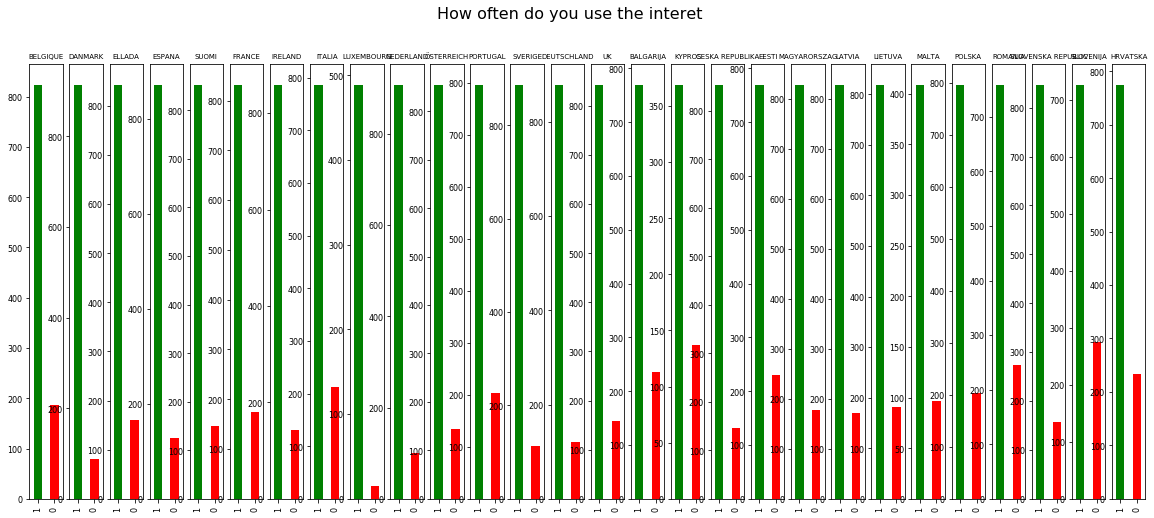

In [91]:
fig = plt.figure()
fig.suptitle('How often do you use the interet', fontsize=16)
subplots = {}
for index, country in enumerate(entriesByCountry):
    entries = entriesByCountry[country];
    barfreq = entries['d8a'].value_counts();
    subplots[country] = plt.subplot(1, 28, index+1);
    subplots[country].set_title(country, size=7)
    barfreq.plot.bar(fontsize=8, ax=subplots[country], figsize=(20,8), color=['green', 'red']);

### Filter By Age Bracket

In [156]:
entriesByAgeBracket = {};

under20arr = []
over20under40arr = []
over40under65arr = []
over65arr = [];

for i, entry in enumerate(newDatabase['d1']):
    floatv = float(entry)
    if (floatv < 20):
        under20arr.append(newDatabase.iloc[i]);
    elif (floatv < 40):
        over20under40arr.append(newDatabase.iloc[i]);
    elif (floatv < 65):
        over40under65arr.append(newDatabase.iloc[i]);
    else:
        over65arr.append(newDatabase.iloc[i]);
        
entriesByAgeBracket['under20'] = pd.DataFrame(under20arr)
entriesByAgeBracket['over20under40'] = pd.DataFrame(over20under40arr)
entriesByAgeBracket['over40under65'] = pd.DataFrame(over40under65arr)
entriesByAgeBracket['over65'] = pd.DataFrame(over65arr)

### Descriptive statistics by age bracket

In [ ]:
# soon

In [197]:
arr = [];
for entries in entriesByAgeBracket:
    internetCount = 0;
    totalCount = len(entriesByAgeBracket[entries]);
    for entry in entriesByAgeBracket[entries]['d8a']:
        if (entry == 'Yes'):
            internetCount += 1;
    percentInternetUsers = internetCount / totalCount;
    percentOnlineBuyers = 0;
    arr.append([percentInternetUsers, percentOnlineBuyers]);
    
df = pd.DataFrame(arr, columns=['% of people who use the internet','% of people who buy online']);

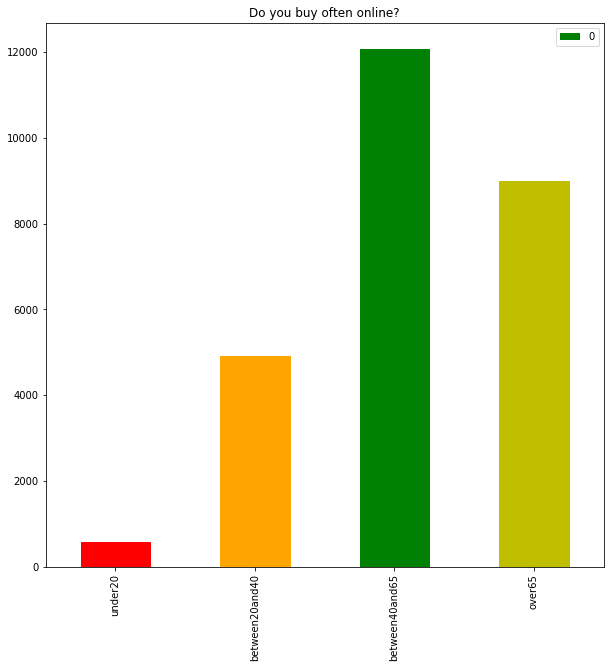

In [7]:
pieRepartition = newDatabase['d1'].value_counts();
dictionary = {}

dictionary["under20"] = 0;
dictionary["between20and40"] = 0;
dictionary["between40and65"] = 0;
dictionary["over65"] = 0

for age, frq in pieRepartition.items():
    if (age < 20):
        dictionary["under20"] += frq;
    elif (age < 40):
        dictionary["between20and40"] += frq;
    elif (age < 65):
        dictionary["between40and65"] += frq;
    else:
        dictionary["over65"] += frq;
        
pieFreq = pd.DataFrame.from_dict(dictionary, orient='index')
ax = pieFreq.plot.bar(title = 'Do you buy often online?', figsize=(10,10), color=['green'])
ax.get_children()[0].set_color('r')
ax.get_children()[1].set_color('orange')
ax.get_children()[2].set_color('g')
ax.get_children()[3].set_color('y')

In [200]:
print(df)

   % of people who use the internet  % of people who buy online
0                          0.996700                           0
1                          0.991037                           0
2                          0.914466                           0
3                          0.609610                           0


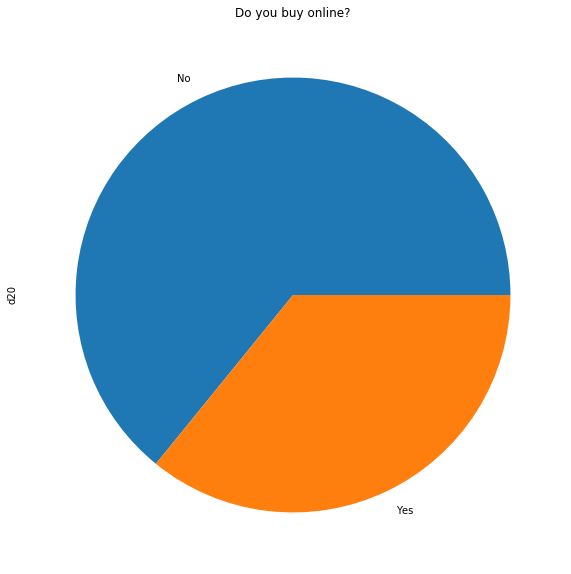

In [203]:
#Use table rather than graph. average age, percentage of females asked. Age differences acrosse countries. 
#bar chart to use
pieFreq = newDatabase['d20'].value_counts()
pieFreq.plot.pie(title = 'Do you buy online?', figsize=(10,10))

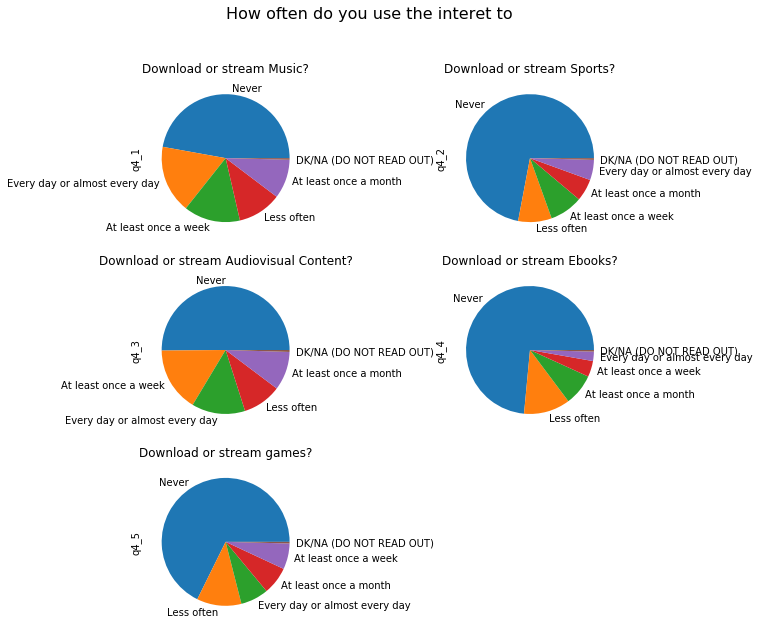

In [15]:
pieDownload_Stream_music = newDatabase['q4_1'].value_counts();
pieDownload_Stream_sports = newDatabase['q4_2'].value_counts()
pieDownload_Stream_audiovis = newDatabase['q4_3'].value_counts();
pieDownload_Stream_ebooks = newDatabase['q4_4'].value_counts();
pieDownload_Stream_gaming = newDatabase['q4_5'].value_counts();

fig = plt.figure()
fig.suptitle('How often do you use the interet to', fontsize=16)
q4_1 = plt.subplot(321);
q4_2 = plt.subplot(322);
q4_3 = plt.subplot(323);
q4_4 = plt.subplot(324);
q4_5 = plt.subplot(325);

q4_1 = pieDownload_Stream_music.plot.pie(title = 'Download or stream Music?', ax=q4_1, figsize=(10,10));
q4_2 = pieDownload_Stream_sports.plot.pie(title = 'Download or stream Sports?', ax=q4_2, figsize=(10,10));
q4_3 = pieDownload_Stream_audiovis.plot.pie(title = 'Download or stream Audiovisual Content?', ax=q4_3, figsize=(10,10));
q4_4 = pieDownload_Stream_ebooks.plot.pie(title = 'Download or stream Ebooks?', ax=q4_4, figsize=(10,10));
q4_5 = pieDownload_Stream_gaming.plot.pie(title = 'Download or stream games?', ax=q4_5, figsize=(10,10));

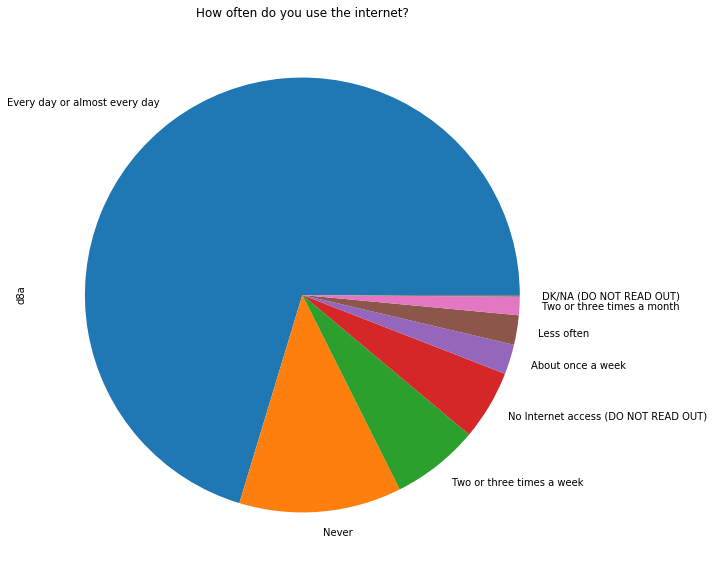

In [31]:
pieFreq = database['d8a'].value_counts()
pieFreq.plot.pie(title = 'How often do you use the internet?', figsize=(10,10))

In [12]:
#pieDownload_Stream_music = database['q4.1'].value_counts()
#pieDownload_Stream_music.plot.pie(title = 'How often did you use the internet do download or stream Music?', figsize=(10,10))
#
#
#pieDownload_Stream_sports = database['d8b'].value_counts()
#pieDownload_Stream_sports.plot.pie(title = 'How often did you use the internet do download or stream sports?', figsize=(10,10))
#
#
#pieDownload_Stream_audiovis = database['d8c'].value_counts()
#pieDownload_Stream_audiovis.plot.pie(title = 'How often did you use the internet do download or stream audio visual content?', figsize=(10,10))
#
#
#pieDownload_Stream_ebooks = database['d8d'].value_counts()
#pieDownload_Stream_ebooks.plot.pie(title = 'How often did you use the internet do download or stream ebooks?', figsize=(10,10))
#
#pieDownload_Stream_gaming = database['d8e'].value_counts()
#pieDownload_Stream_gaming.plot.pie(title = 'How often did you use the internet do download or stream gaming apps?', figsize=(10,10))
#

keys= database.keys();
[print(a) for a in keys]

tnscntry
serialid
caseid
mode
studyno
doi
version
survey
edition
uniqid
country
isocntry
d18
d19r
d19
d20
d18_d20
d8a
d8b.1
d8b.2
d8b.3
d8b.4
d8b.5
d8b.6
d8b.7
d8b.8
d8b.9
d9
d10
q1.1
q1.2
q1.3
q1.4
q1.5
q1.6
q1.7
q1.8
q2
q3
q4_1
q4_2
q4_3
q4_4
q4_5
q4t
q5_1
q5_2
q5_3
q5_4
q5_5
q5t.1
q5t.2
q6.1
q6.2
q6.3
q6.4
q6.5
q6.6
q7
q8
q9a
q9b
q10_1
q10_2
q10_3
q10_4
q10_5
q11.1
q11.2
q11.3
q11.4
q11.5
q11.6
q11.7
q12.1
q12.2
q12.3
q12.4
q12.5
q12.6
q12.7
q12.8
q12.9
q13.1
q13.2
q13.3
q13.4
q13.5
q13.6
q13.7
q13.8
q14.1
q14.2
q14.3
q14.4
q14.5
q14.6
q14.7
q14.8
q15.1
q15.2
q15.3
q15.4
q15.5
q15.6
q15.7
q15.8
q15.9
d1
d1r1
d1r2
d2
d3a.1
d3a.2
d3a.3
d3a.4
d3a.5
d3a.6
d3a.7
d3a.8
d3a.9
d3a.10
d3a.11
d3a.12
d3a.13
d3a.14
d3a.15
d3a.16
d3a.17
d3a.18
d3a.19
d3a.20
d3a.21
d3a.22
d3a.23
d3a.24
d3a.25
d3a.26
d3a.27
d3a.28
d3a.98
d3a.99
d4
d4r1
d4r2
d5
d5r
d13
d22
d22r
d12be
d12be_r
d12at
d12at_r
d12bg
d12cy
d12cz
d12dk
d12ee
d12de
d12gr
d12gr_r
d12es
d12es_r
d12fi
d12fr
d12fr_r
d12gb
d12hu
d12ie
d12it
d12

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [ ]:
##Categorization in function of cultural proximity
## Geographical boundaries
The modern physical geographic regions of Europe, include:

Central_Europe
Eastern Europe
Northeastern Europe
Northern_Europe
Northwestern_Europe
Southeastern_Europe
Southern Europe
Southwestern Europe
Western Europe


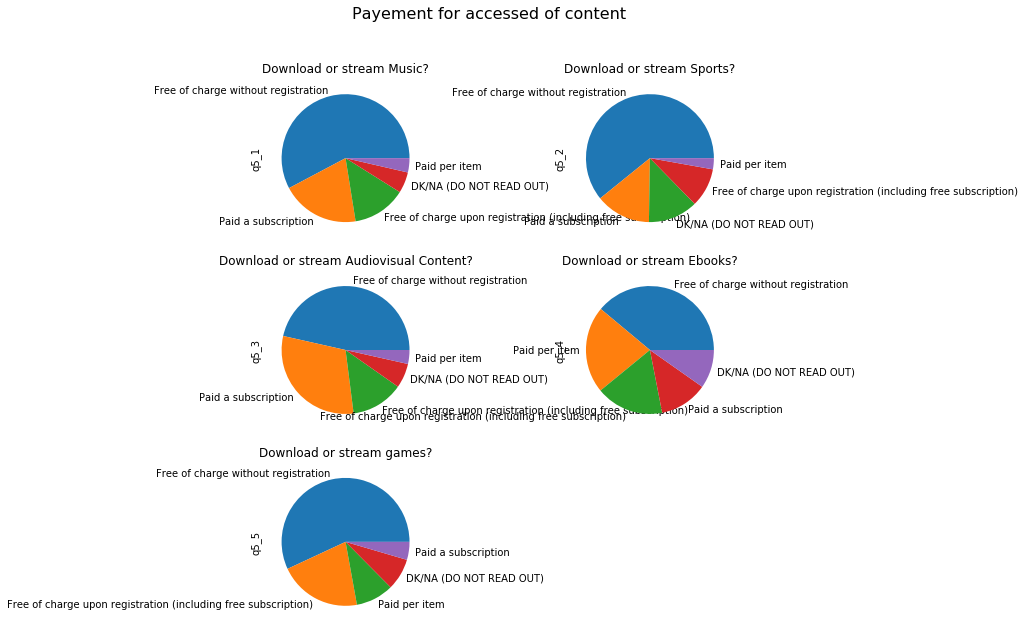

In [16]:
piePayment_Stream_music = database['q5_1'].value_counts();
piePayment_Stream_sports = database['q5_2'].value_counts()
piePayment_Stream_audiovis = database['q5_3'].value_counts();
piePayment_Stream_ebooks = database['q5_4'].value_counts();
piePayment_Stream_gaming = database['q5_5'].value_counts();

fig = plt.figure()
fig.suptitle('Payement for accessed of content', fontsize=16)
q5_1 = plt.subplot(321);
q5_2 = plt.subplot(322);
q5_3 = plt.subplot(323);
q5_4 = plt.subplot(324);
q5_5 = plt.subplot(325);

q5_1 = piePayment_Stream_music.plot.pie(title = 'Download or stream Music?', ax=q5_1, figsize=(10,10));
q5_2 = piePayment_Stream_sports.plot.pie(title = 'Download or stream Sports?', ax=q5_2, figsize=(10,10));
q5_3 = piePayment_Stream_audiovis.plot.pie(title = 'Download or stream Audiovisual Content?', ax=q5_3, figsize=(10,10));
q5_4 = piePayment_Stream_ebooks.plot.pie(title = 'Download or stream Ebooks?', ax=q5_4, figsize=(10,10));
q5_5 = piePayment_Stream_gaming.plot.pie(title = 'Download or stream games?', ax=q5_5, figsize=(10,10));

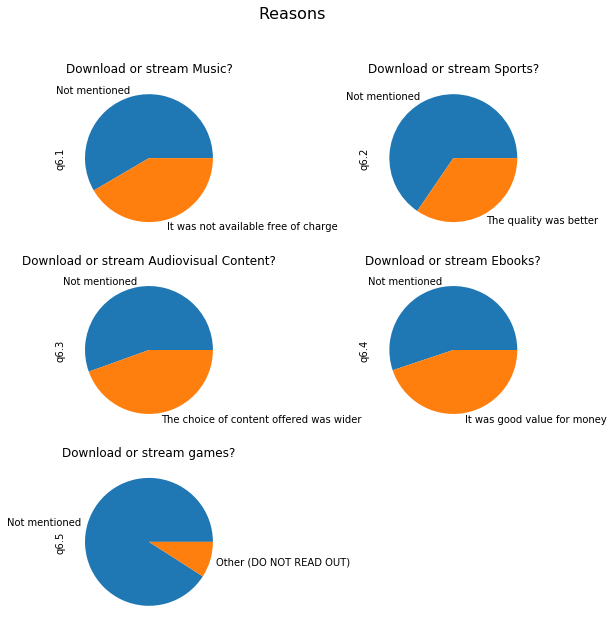

In [28]:
piePayment_Stream_music = database['q6.1'].value_counts();
piePayment_Stream_sports = database['q6.2'].value_counts()
piePayment_Stream_audiovis = database['q6.3'].value_counts();
piePayment_Stream_ebooks = database['q6.4'].value_counts();
piePayment_Stream_gaming = database['q6.5'].value_counts();

fig = plt.figure()
fig.suptitle('Reasons', fontsize=16)
q6_1 = plt.subplot(321);
q6_2 = plt.subplot(322);
q6_3 = plt.subplot(323);
q6_4 = plt.subplot(324);
q6_5 = plt.subplot(325);

q6_1 = piePayment_Stream_music.plot.pie(title = 'Download or stream Music?', ax=q6_1, figsize=(10,10));
q6_2 = piePayment_Stream_sports.plot.pie(title = 'Download or stream Sports?', ax=q6_2, figsize=(10,10));
q6_3 = piePayment_Stream_audiovis.plot.pie(title = 'Download or stream Audiovisual Content?', ax=q6_3, figsize=(10,10));
q6_4 = piePayment_Stream_ebooks.plot.pie(title = 'Download or stream Ebooks?', ax=q6_4, figsize=(10,10));
q6_5 = piePayment_Stream_gaming.plot.pie(title = 'Download or stream games?', ax=q6_5, figsize=(10,10));

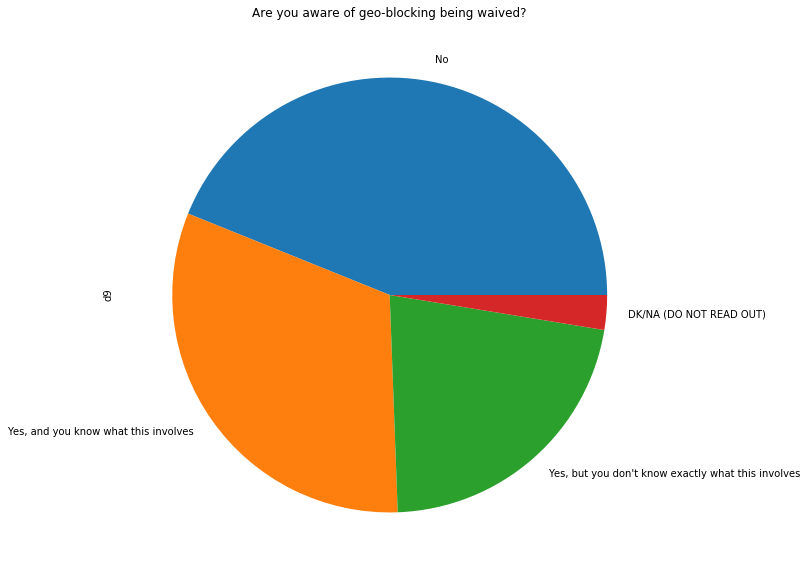

In [23]:
piePossibility1 = database['d9'].value_counts()
piePossibility1.plot.pie(title = 'Are you aware of geo-blocking being waived?', figsize=(10,10))

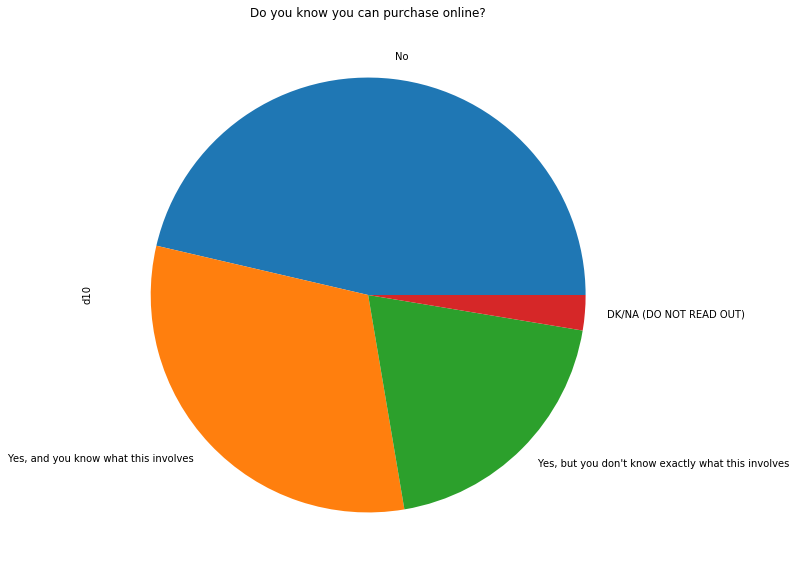

In [24]:
piePossibility2 = database['d10'].value_counts()
piePossibility2.plot.pie(title = 'Do you know you can purchase online?', figsize=(10,10))